# Important Libraries

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc , confusion_matrix , precision_recall_curve
from imblearn.over_sampling import SMOTE , ADASYN
from xgboost import XGBClassifier

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)


# Reading Dataset

In [50]:
data = pd.read_csv('/content/Merged.csv')

In [51]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,AMT_ANNUITY_MEAN,HOUR_APPR_PROCESS_START,AMT_GOODS_PRICE,AMT_CREDIT
0,100002,1,Cash loans,M,N,Y,0,202500.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,WEDNESDAY,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,-1134.0,1,0.0,0.0,0.0,1.0,Consumer loans,179055.0,1,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Auto technology,24.0,low_normal,POS other with interest,16976.1375,10,265027.50,292826.25
1,100003,0,Cash loans,F,N,N,0,270000.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,MONDAY,0,0,0,School,0.622246,0.535276,0.0,-828.0,1,0.0,0.0,0.0,0.0,Cash loans,900000.0,1,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,XNA,12.0,low_normal,Cash X-Sell: low,67027.7475,12,1014750.00,1164692.25
2,100003,0,Cash loans,F,N,N,0,270000.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,MONDAY,0,0,0,School,0.622246,0.535276,0.0,-828.0,1,0.0,0.0,0.0,0.0,Consumer loans,337500.0,1,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Furniture,6.0,middle,POS industry with interest,50133.0825,14,733500.00,821070.00
3,100003,0,Cash loans,F,N,N,0,270000.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,MONDAY,0,0,0,School,0.622246,0.535276,0.0,-828.0,1,0.0,0.0,0.0,0.0,Consumer loans,68809.5,1,XAP,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Consumer electronics,12.0,middle,POS household with interest,21217.9050,13,599154.75,680778.00
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,MONDAY,0,0,0,Government,0.555912,0.729567,0.0,-815.0,0,0.0,0.0,0.0,0.0,Consumer loans,24282.0,1,XAP,Approved,815,Cash through the bank,XAP,New,Mobile,POS,XNA,Connectivity,4.0,middle,POS mobile without interest,6053.6250,7,79641.00,77553.00


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67483 entries, 0 to 67482
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   67483 non-null  int64  
 1   TARGET                       67483 non-null  int64  
 2   NAME_CONTRACT_TYPE_x         67483 non-null  object 
 3   CODE_GENDER                  67483 non-null  object 
 4   FLAG_OWN_CAR                 67483 non-null  object 
 5   FLAG_OWN_REALTY              67483 non-null  object 
 6   CNT_CHILDREN                 67483 non-null  int64  
 7   AMT_INCOME_TOTAL             67483 non-null  float64
 8   NAME_TYPE_SUITE              67483 non-null  object 
 9   NAME_INCOME_TYPE             67483 non-null  object 
 10  NAME_EDUCATION_TYPE          67483 non-null  object 
 11  NAME_FAMILY_STATUS           67483 non-null  object 
 12  NAME_HOUSING_TYPE            67483 non-null  object 
 13  REGION_POPULATIO

In [53]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_APPLICATION,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,CNT_PAYMENT,AMT_ANNUITY_MEAN,HOUR_APPR_PROCESS_START,AMT_GOODS_PRICE,AMT_CREDIT
count,67483.000000,67483.000000,67483.000000,6.748300e+04,67483.000000,67483.000000,67483.000000,67483.000000,67483.000000,67483.00000,67483.000000,67483.000000,67483.000000,67483.000000,67483.000000,67483.000000,67483.000000,67483.000000,67483.000000,67483.000000,67483.000000,67483.000000,67483.000000,6.748300e+04,67483.000000,67483.000000,67483.000000,67483.000000,67483.000000,6.748300e+04,6.748200e+04
mean,108870.021383,0.084258,0.415808,1.775251e+05,0.020689,16265.502186,71022.385727,4950.478906,3007.425603,2.16785,2.035179,0.072981,0.222219,0.174933,0.514258,0.500090,0.116118,-1071.847784,0.741535,0.007113,0.032497,0.270690,2.607220,1.827646e+05,0.996369,892.659559,13.046797,20935.160653,12.265178,3.739815e+05,4.003984e+05
std,5165.173243,0.277777,0.723611,7.839815e+05,0.013383,4299.505295,142034.732161,3543.606988,1516.920627,0.89983,0.490273,0.260108,0.415741,0.379913,0.189024,0.179408,0.404805,800.719549,0.437794,0.099239,0.186840,0.954791,2.102508,3.018804e+05,0.060145,784.529350,14.647826,10611.883857,2.752405,2.445917e+05,2.700159e+05
min,100002.000000,0.000000,0.000000,2.565000e+04,0.000533,7689.000000,11.000000,0.000000,0.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000044,0.000527,0.000000,-3882.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,2713.410000,2.000000,2.885175e+04,2.250000e+04
25%,104384.000000,0.000000,0.000000,1.125000e+05,0.010006,12687.000000,1060.000000,1949.000000,1723.000000,2.00000,2.000000,0.000000,0.000000,0.000000,0.394138,0.387625,0.000000,-1669.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.421000e+04,1.000000,278.000000,0.000000,13621.387500,10.000000,1.924312e+05,2.000475e+05
50%,108869.000000,0.000000,0.000000,1.575000e+05,0.018850,16014.000000,2407.000000,4434.000000,3296.000000,2.00000,2.000000,0.000000,0.000000,0.000000,0.564478,0.535276,0.000000,-1005.000000,1.000000,0.000000,0.000000,0.000000,2.000000,7.590600e+04,1.000000,603.000000,10.000000,18778.140000,12.000000,3.105000e+05,3.380299e+05
75%,113347.000000,0.000000,1.000000,2.160000e+05,0.026392,19860.000000,6113.000000,7392.000000,4311.000000,3.00000,2.000000,0.000000,0.000000,0.000000,0.662777,0.624615,0.000000,-385.000000,1.000000,0.000000,0.000000,0.000000,4.000000,1.925662e+05,1.000000,1334.000000,18.000000,25773.750000,14.000000,4.837500e+05,5.287500e+05
max,117851.000000,1.000000,8.000000,1.170000e+08,0.072508,25160.000000,365243.000000,20981.000000,6228.000000,10.00000,3.000000,1.000000,1.000000,1.000000,0.855000,0.885488,5.000000,0.000000,1.000000,5.000000,5.000000,24.000000,16.000000,4.185000e+06,1.000000,2922.000000,84.000000,160109.662500,22.000000,2.677500e+06,2.651418e+06


## Handle Target with Risky and Non Risky Customers

**Integrating historical customer payment behavior into the loan approval process is a common and effective strategy in risk assessment and automated decision-making. The underlying logic involves evaluating a customer's past payment history, specifically checking for any previous negative decisions such as late payments, defaults, or fraud incidents. If a customer has even a single instance of such severe issues, this typically indicates higher credit risk. Consequently, the system automatically flags and rejects new loan applications from these customers to prevent potential financial losses and to streamline operational efficiency. Customers without prior negative incidents proceed through additional standard evaluation procedures. This structured approach ensures consistency, reduces manual workload, and supports proactive risk management.**

In [54]:
summary = data.groupby('SK_ID_CURR')['TARGET'].value_counts().unstack(fill_value=0)
print(summary)
summary.columns = ['No_Issue_Count', 'Payment_Issue_Count']



TARGET      0  1
SK_ID_CURR      
100002      0  1
100003      3  0
100004      1  0
100006      8  0
100007      6  0
...        .. ..
117845      2  0
117846      6  0
117848      4  0
117849      7  0
117851      3  0

[14512 rows x 2 columns]


In [55]:
summary

,No_Issue_Count,Payment_Issue_Count
SK_ID_CURR,,
100002,0,1
100003,3,0
100004,1,0
100006,8,0
100007,6,0
...,...,...
117845,2,0
117846,6,0
117848,4,0


In [56]:
customer_risk_summary = data.groupby('SK_ID_CURR')['TARGET'].max().reset_index()
customer_risk = customer_id_with_issue = customer_id_with_issue = pd.DataFrame({
    'SK_ID_CURR': customer_risk_summary['SK_ID_CURR'],
    'Has_Historical_Payment_Issue': customer_risk_summary['TARGET'].astype(bool)
})

customer_id_with_issue

,SK_ID_CURR,Has_Historical_Payment_Issue
0,100002,True
1,100003,False
2,100004,False
3,100006,False
4,100007,False
...,...,...
14507,117845,False
14508,117846,False
14509,117848,False
14510,117849,False


In [57]:
data = data.merge(customer_id_with_issue , how='inner' , on='SK_ID_CURR')
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,AMT_ANNUITY_MEAN,HOUR_APPR_PROCESS_START,AMT_GOODS_PRICE,AMT_CREDIT,Has_Historical_Payment_Issue
0,100002,1,Cash loans,M,N,Y,0,202500.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,WEDNESDAY,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,-1134.0,1,0.0,0.0,0.0,1.0,Consumer loans,179055.0,1,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Auto technology,24.0,low_normal,POS other with interest,16976.1375,10,265027.50,292826.25,True
1,100003,0,Cash loans,F,N,N,0,270000.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,MONDAY,0,0,0,School,0.622246,0.535276,0.0,-828.0,1,0.0,0.0,0.0,0.0,Cash loans,900000.0,1,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,XNA,12.0,low_normal,Cash X-Sell: low,67027.7475,12,1014750.00,1164692.25,False
2,100003,0,Cash loans,F,N,N,0,270000.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,MONDAY,0,0,0,School,0.622246,0.535276,0.0,-828.0,1,0.0,0.0,0.0,0.0,Consumer loans,337500.0,1,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Furniture,6.0,middle,POS industry with interest,50133.0825,14,733500.00,821070.00,False
3,100003,0,Cash loans,F,N,N,0,270000.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,MONDAY,0,0,0,School,0.622246,0.535276,0.0,-828.0,1,0.0,0.0,0.0,0.0,Consumer loans,68809.5,1,XAP,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Consumer electronics,12.0,middle,POS household with interest,21217.9050,13,599154.75,680778.00,False
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,MONDAY,0,0,0,Government,0.555912,0.729567,0.0,-815.0,0,0.0,0.0,0.0,0.0,Consumer loans,24282.0,1,XAP,Approved,815,Cash through the bank,XAP,New,Mobile,POS,XNA,Connectivity,4.0,middle,POS mobile without interest,6053.6250,7,79641.00,77553.00,False


In [58]:
data['DECISION'] = data['Has_Historical_Payment_Issue'].apply(lambda x: 0 if x == True else 1)

In [59]:
data['DECISION'].value_counts()

,count
DECISION,
1,61797
0,5686


In [60]:
data['TARGET'].value_counts()

,count
TARGET,
0,61797
1,5686


In [61]:
data.drop(['TARGET' , 'Has_Historical_Payment_Issue'] , axis = 1 , inplace = True)

**For Now our Target Column is DECISION with 1 isn't Risky and 0 is a Risky Customer**

# Data Cleaning

In [62]:
# Null Values
data.isnull().sum()

,0
SK_ID_CURR,0
NAME_CONTRACT_TYPE_x,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_TYPE_SUITE,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0


In [63]:
data.dropna(inplace =True)

In [64]:
data.drop('SK_ID_CURR' , axis = 1 , inplace = True)

In [65]:
# Check Duplicates after Remove ID
data.duplicated().sum()

np.int64(318)

In [66]:
data.drop_duplicates(inplace=True , keep = 'first')

In [67]:
data.duplicated().sum()

np.int64(0)

In [68]:
# Check Outliers for Numeric Columns

data.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_APPLICATION,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,CNT_PAYMENT,AMT_ANNUITY_MEAN,HOUR_APPR_PROCESS_START,AMT_GOODS_PRICE,AMT_CREDIT,DECISION
count,67164.000000,6.716400e+04,67164.000000,67164.000000,67164.000000,67164.000000,67164.000000,67164.000000,67164.000000,67164.000000,67164.000000,67164.000000,67164.000000,67164.000000,67164.000000,67164.000000,67164.000000,67164.000000,67164.000000,67164.000000,67164.000000,6.716400e+04,67164.000000,67164.000000,67164.000000,67164.000000,67164.000000,6.716400e+04,6.716400e+04,67164.000000
mean,0.415714,1.775154e+05,0.020684,16263.956658,70948.594232,4950.805000,3008.325576,2.167634,2.035257,0.072986,0.222441,0.175124,0.514337,0.500205,0.116074,-1072.420746,0.741350,0.007102,0.032592,0.270651,2.604059,1.835121e+05,0.996352,895.616580,13.100411,20947.090667,12.265752,3.741398e+05,4.008468e+05,0.915848
std,0.723657,7.858170e+05,0.013379,4299.364998,141975.692890,3543.576427,1516.585957,0.899996,0.490193,0.260115,0.415889,0.380076,0.188914,0.179459,0.404645,800.968496,0.437896,0.099101,0.187121,0.955809,2.101676,3.023387e+05,0.060287,784.996059,14.654050,10624.410662,2.752336,2.448735e+05,2.702564e+05,0.277618
min,0.000000,2.565000e+04,0.000533,7689.000000,11.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000044,0.000527,0.000000,-3882.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,2713.410000,2.000000,2.885175e+04,2.250000e+04,0.000000
25%,0.000000,1.125000e+05,0.010006,12687.000000,1060.000000,1949.000000,1725.750000,2.000000,2.000000,0.000000,0.000000,0.000000,0.394925,0.387625,0.000000,-1669.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.470500e+04,1.000000,279.000000,0.000000,13626.590625,10.000000,1.924284e+05,2.002607e+05,1.000000
50%,0.000000,1.575000e+05,0.018850,16013.000000,2404.000000,4436.000000,3296.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.564478,0.535276,0.000000,-1007.000000,1.000000,0.000000,0.000000,0.000000,2.000000,7.645500e+04,1.000000,608.000000,10.000000,18783.483750,12.000000,3.105000e+05,3.388320e+05,1.000000
75%,1.000000,2.160000e+05,0.026392,19854.250000,6109.000000,7392.000000,4312.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.662777,0.624615,0.000000,-385.000000,1.000000,0.000000,0.000000,0.000000,4.000000,1.936181e+05,1.000000,1339.000000,18.000000,25793.133750,14.000000,4.837500e+05,5.294036e+05,1.000000
max,8.000000,1.170000e+08,0.072508,25160.000000,365243.000000,20981.000000,6228.000000,10.000000,3.000000,1.000000,1.000000,1.000000,0.855000,0.885488,5.000000,0.000000,1.000000,5.000000,5.000000,24.000000,16.000000,4.185000e+06,1.000000,2922.000000,84.000000,160109.662500,22.000000,2.677500e+06,2.651418e+06,1.000000


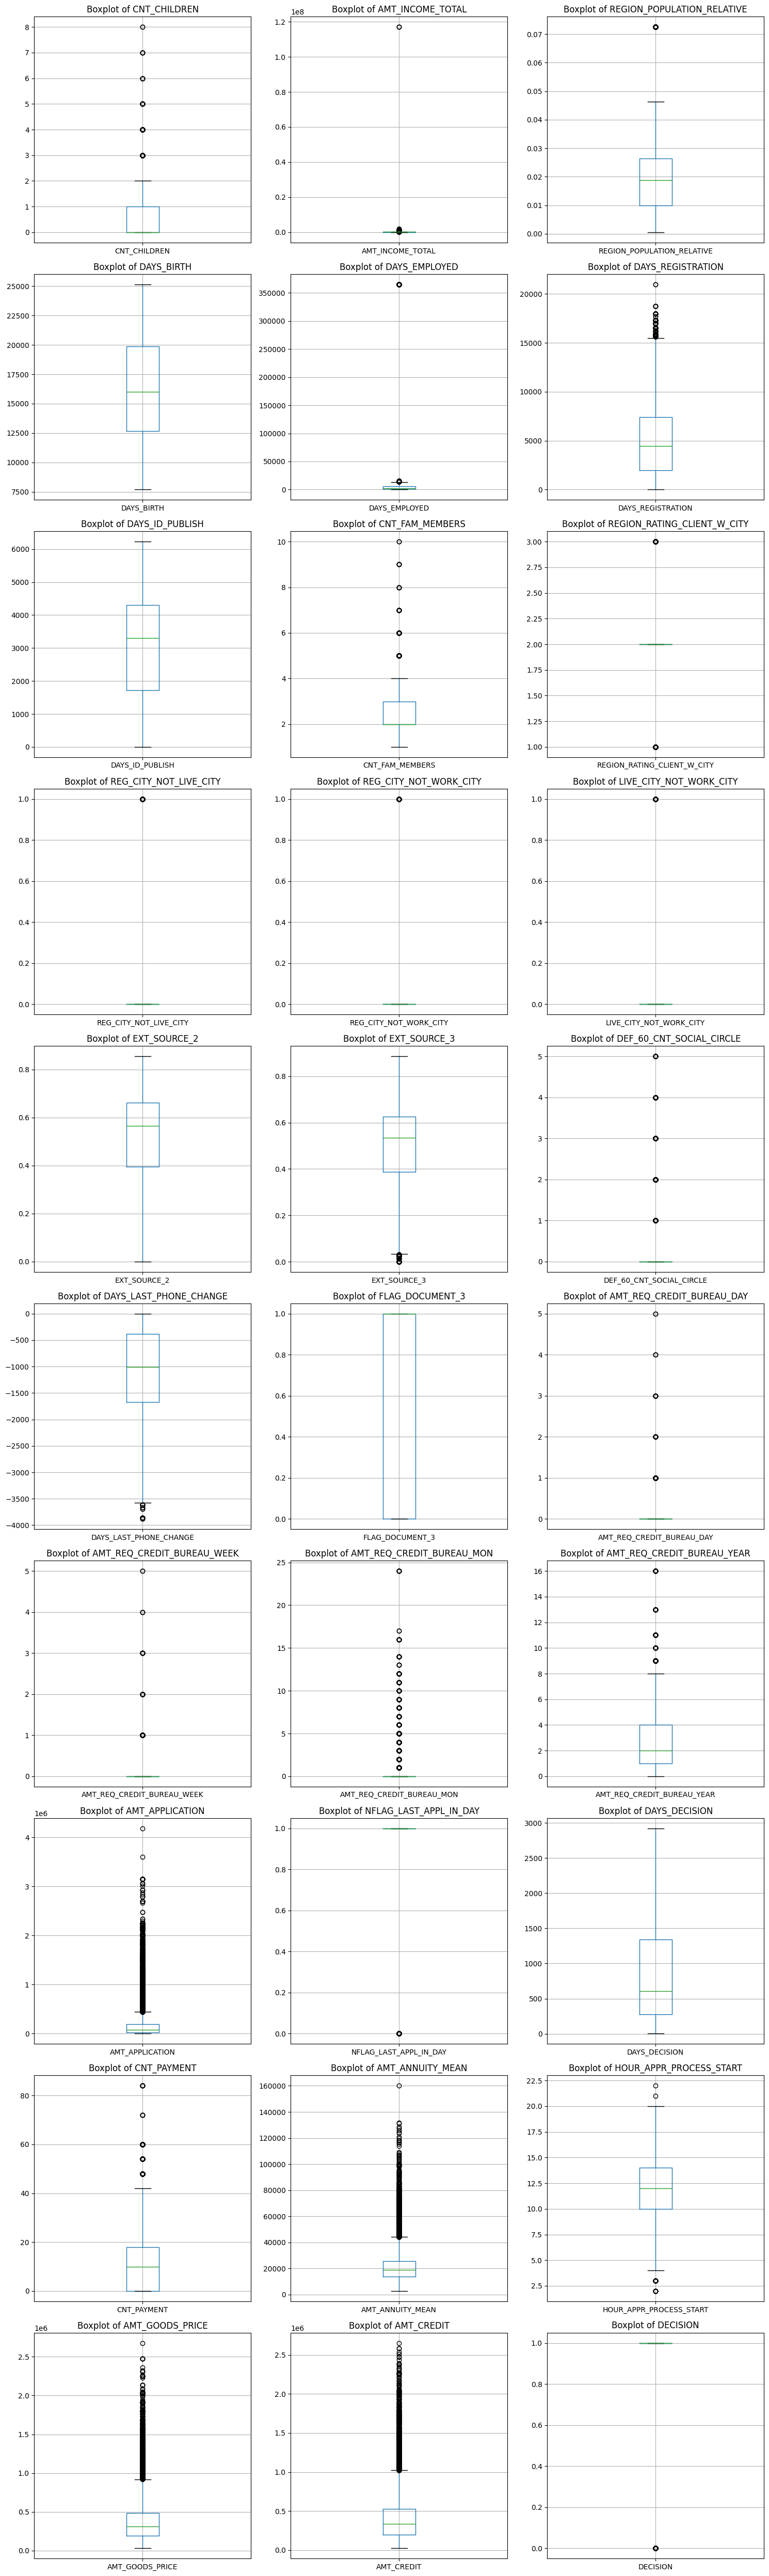

In [69]:
# Visualize Box Plot to check the outliers for all numeric columns
def plot_numeric_boxplots(df, cols_per_row=3):
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
    num_cols = len(numeric_cols)

    if num_cols == 0:
        print("No numeric columns to plot.")
        return

    rows = num_cols // cols_per_row + (num_cols % cols_per_row > 0)

    fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 5, rows * 5))
    axes = axes.flatten()

    for idx, col in enumerate(numeric_cols):
        df.boxplot(column=col, ax=axes[idx])
        axes[idx].set_title(f'Boxplot of {col}')

    for idx in range(num_cols, len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.show()

plot_numeric_boxplots(data)

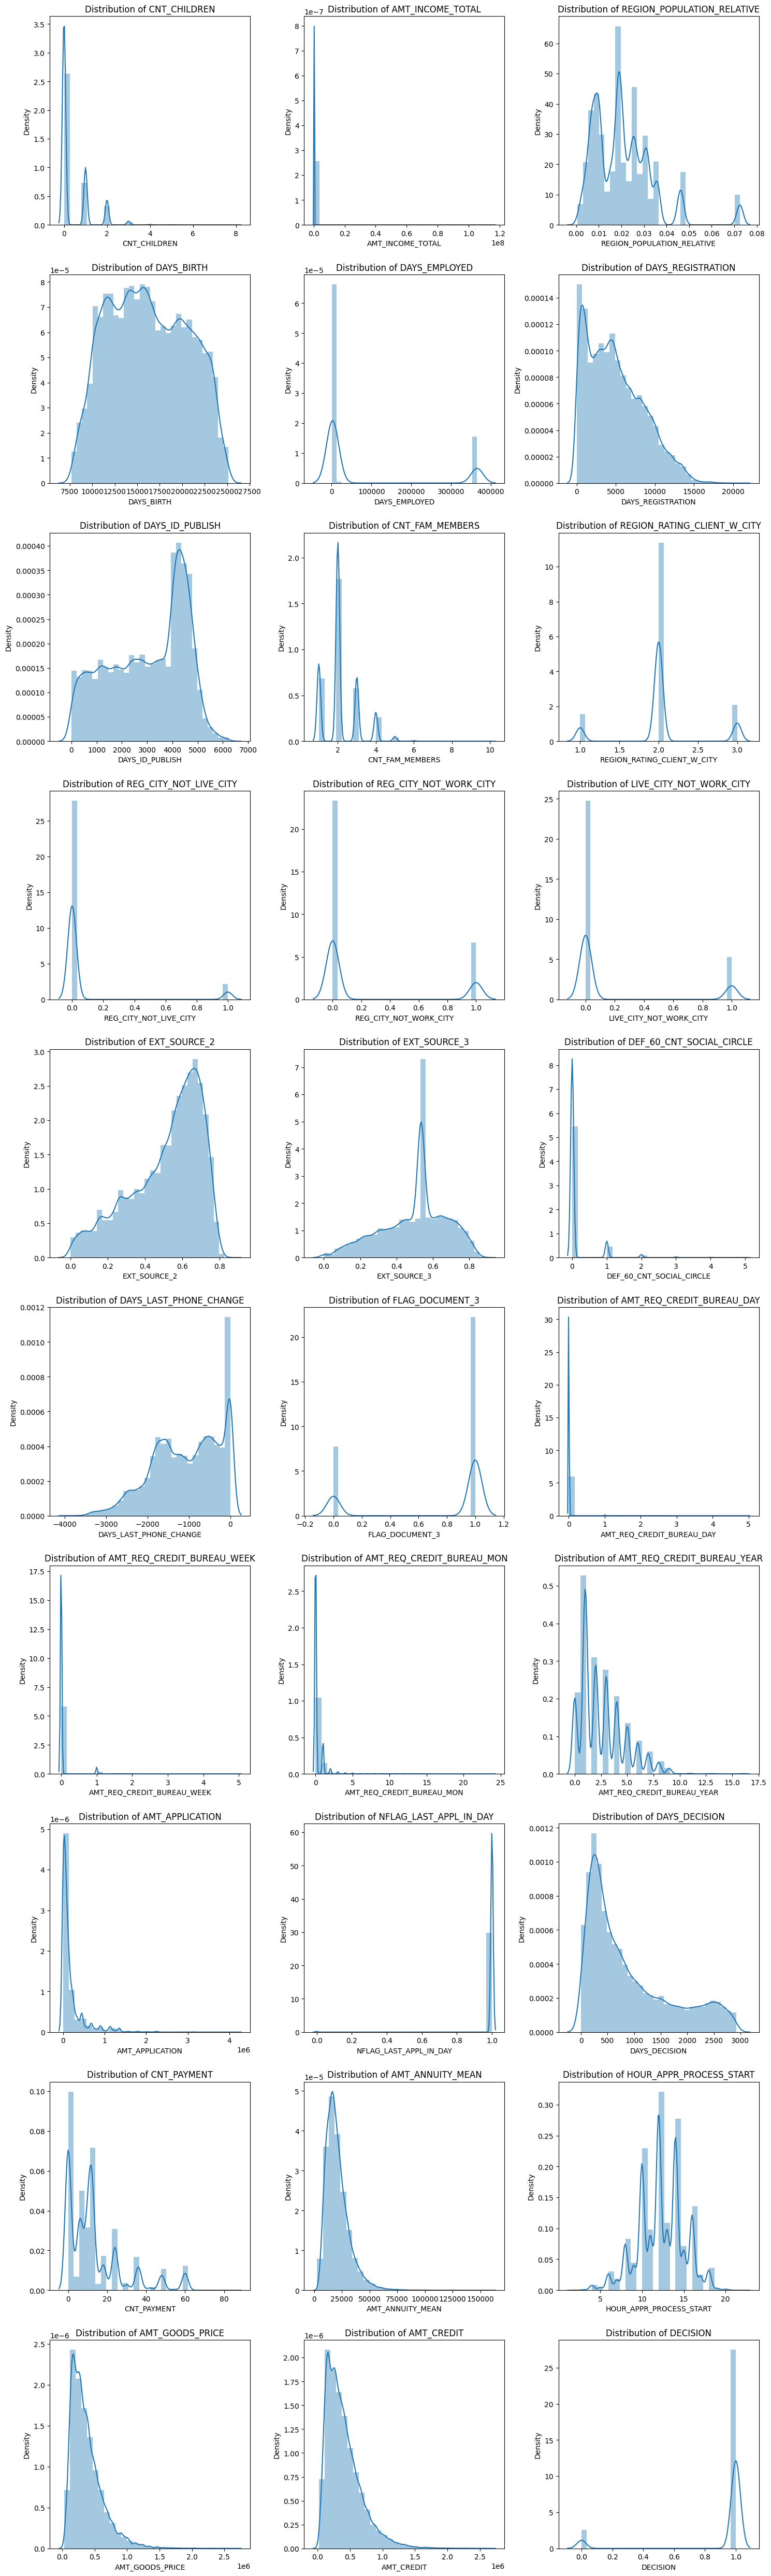

In [70]:
# Visualize Distribution plot
def plot_numeric_distplots(df, cols_per_row=3):
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
    num_cols = len(numeric_cols)

    if num_cols == 0:
        print("No numeric columns to plot.")
        return

    rows = -(-num_cols // cols_per_row)
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 5, rows * 5))

    if rows == 1:
        axes = np.array([axes])
    axes = axes.flatten()

    for idx, col in enumerate(numeric_cols):
        sns.distplot(df[col], ax=axes[idx], kde=True, bins=30)
        axes[idx].set_title(f'Distribution of {col}')

    for idx in range(num_cols, len(axes)):
        axes[idx].set_visible(False)

    plt.tight_layout()
    plt.show()

plot_numeric_distplots(data)

### Using IQR to that columns with Skewd Distribution

**AMT_CREDIT , AMT_ANNUITY_MEAN , AMT_GOODS_PRICE , CNT_CHILDREN , CNT_FAM_MEMBERS , DAYS_EMPLOYED , AMT_INCOME_TOTAL
DAYS_LAST_PHONE_CHANGE , DEF_60_CNT_SOCIAL_CIRCLE , AMT_REQ_CREDIT_BUREAU_MON , AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_DAY**

**Another Columns isn't need to Handle**

In [71]:
columns = [
    'AMT_CREDIT', 'AMT_ANNUITY_MEAN', 'AMT_GOODS_PRICE', 'CNT_CHILDREN',
    'CNT_FAM_MEMBERS', 'DAYS_EMPLOYED', 'AMT_INCOME_TOTAL', 'DAYS_LAST_PHONE_CHANGE',
    'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_DAY'
]

for col in columns:
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  if lower_bound < 0:
      lower_bound = 0
  print(col, data['DECISION'][data[col] > upper_bound].value_counts())

  # Drop rows where DECISION == 1 and the value is above the upper bound
  data = data[~((data[col] > upper_bound) & (data['DECISION'] == 1))]

  # Impute outliers where DECISION == 0 using median
  median_value = data[col].median()
  data.loc[(data[col] > upper_bound) & (data['DECISION'] == 0), col] = median_value

AMT_CREDIT DECISION
1    2040
0     163
Name: count, dtype: int64
AMT_ANNUITY_MEAN DECISION
1    1540
0     186
Name: count, dtype: int64
AMT_GOODS_PRICE DECISION
1    837
0    223
Name: count, dtype: int64
CNT_CHILDREN DECISION
1    831
0    128
Name: count, dtype: int64
CNT_FAM_MEMBERS DECISION
0    121
Name: count, dtype: int64
DAYS_EMPLOYED DECISION
1    11257
0      758
Name: count, dtype: int64
AMT_INCOME_TOTAL DECISION
1    1733
0     287
Name: count, dtype: int64
DAYS_LAST_PHONE_CHANGE Series([], Name: count, dtype: int64)
DEF_60_CNT_SOCIAL_CIRCLE DECISION
1    3875
0     706
Name: count, dtype: int64
AMT_REQ_CREDIT_BUREAU_MON DECISION
1    6454
0     879
Name: count, dtype: int64
AMT_REQ_CREDIT_BUREAU_WEEK DECISION
1    1109
0     205
Name: count, dtype: int64
AMT_REQ_CREDIT_BUREAU_DAY DECISION
1    132
0     67
Name: count, dtype: int64


In [72]:
data['DECISION'].value_counts()

,count
DECISION,
1,31704
0,5652


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37356 entries, 0 to 67479
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   NAME_CONTRACT_TYPE_x         37356 non-null  object 
 1   CODE_GENDER                  37356 non-null  object 
 2   FLAG_OWN_CAR                 37356 non-null  object 
 3   FLAG_OWN_REALTY              37356 non-null  object 
 4   CNT_CHILDREN                 37356 non-null  int64  
 5   AMT_INCOME_TOTAL             37356 non-null  float64
 6   NAME_TYPE_SUITE              37356 non-null  object 
 7   NAME_INCOME_TYPE             37356 non-null  object 
 8   NAME_EDUCATION_TYPE          37356 non-null  object 
 9   NAME_FAMILY_STATUS           37356 non-null  object 
 10  NAME_HOUSING_TYPE            37356 non-null  object 
 11  REGION_POPULATION_RELATIVE   37356 non-null  float64
 12  DAYS_BIRTH                   37356 non-null  int64  
 13  DAYS_EMPLOYED        

In [74]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'NAME_CONTRACT_TYPE_y', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']
Numerical Columns: ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CRED

# Feature Selection

## Check Correlation for Numeric Columns

<Axes: >

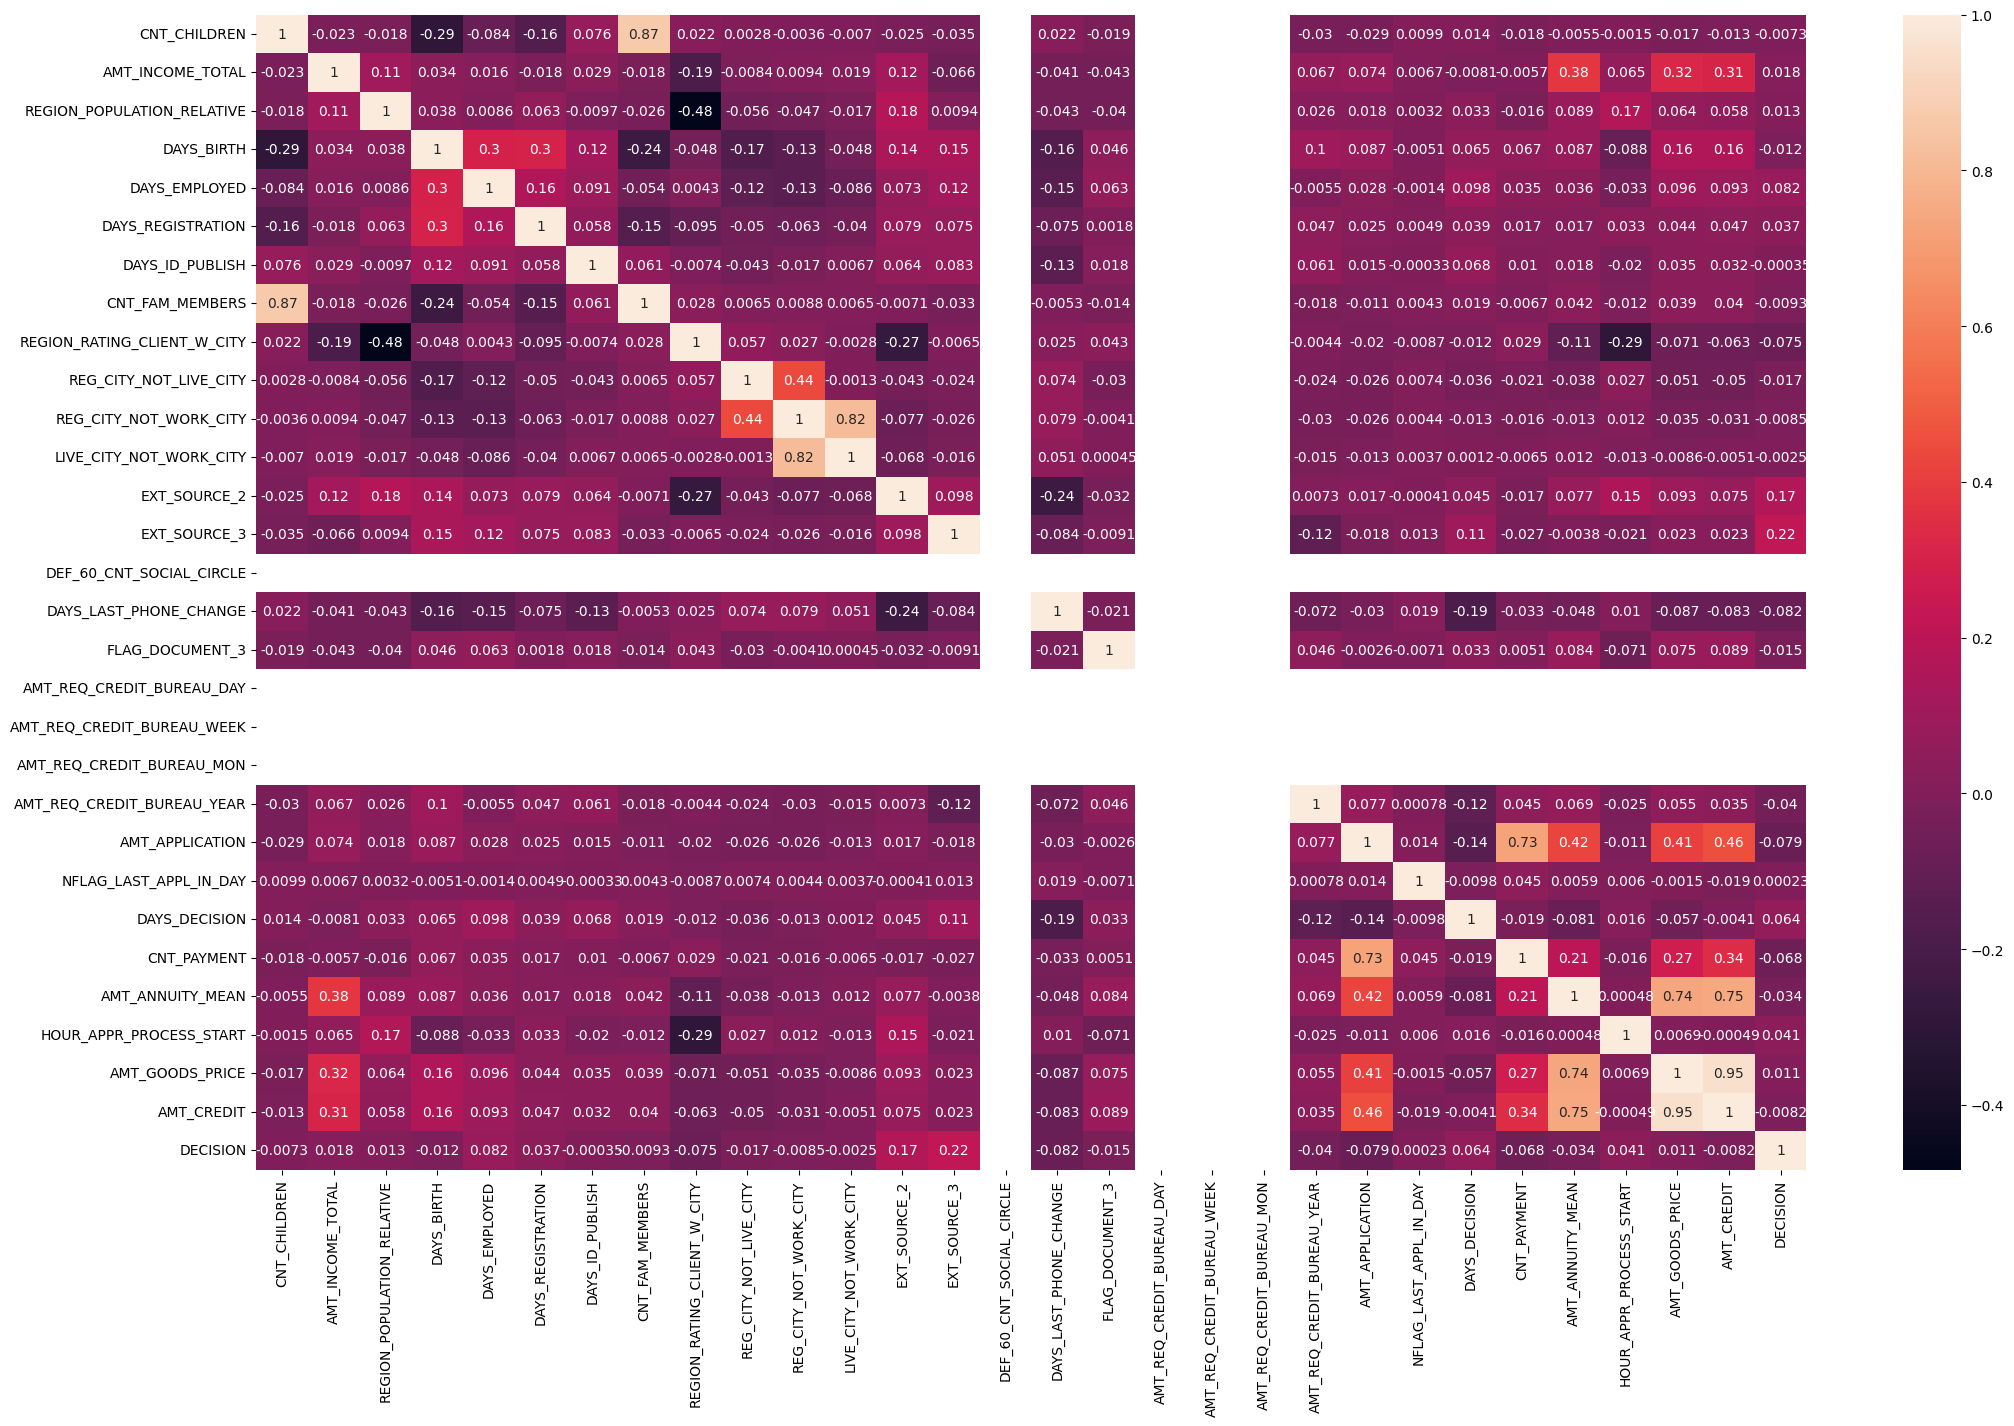

In [75]:
plt.figure(figsize=(25, 15))
sns.heatmap(data.loc[:, numerical_cols].corr() , annot = True )

In [76]:
data['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts()

,count
DEF_60_CNT_SOCIAL_CIRCLE,
0.0,37356


In [77]:
data['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

,count
AMT_REQ_CREDIT_BUREAU_DAY,
0.0,37356


In [78]:
data['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

,count
AMT_REQ_CREDIT_BUREAU_WEEK,
0.0,37356


In [79]:
data['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

,count
AMT_REQ_CREDIT_BUREAU_MON,
0.0,37356


**From that 4 Columns has a Constant Value So we will drop it because they have zero variance and contribute nothing to distinguishing different data points**

In [80]:
data.drop(['DEF_60_CNT_SOCIAL_CIRCLE' , 'AMT_REQ_CREDIT_BUREAU_DAY' , 'AMT_REQ_CREDIT_BUREAU_WEEK' , 'AMT_REQ_CREDIT_BUREAU_MON'] , axis = 1 , inplace = True)


**Features to Drop (Very Low Correlation with DECISION)

CNT_CHILDREN (r ≈ -0.036, insignificant)
REGION_POPULATION_RELATIVE (r ≈ 0.002, no impact)
FLAG_DOCUMENT_3 (r ≈ -0.003, negligible impact)
DAYS_LAST_PHONE_CHANGE (r ≈ -0.024, weak impact)**

**Remove Highly Correlated Features (Multicollinearity)
Some features are too correlated with each other (r > 0.90), meaning they contain redundant information. We should keep only one from each correlated group:**

**High Multicollinearity Features (Keep One, Drop Others)**

**LIVE_CITY_NOT_WORK_CITY and REG_CITY_NOT_WORK_CITY (r ≈ 0.82) → Keep one, drop the other**

**AMT_CREDIT and AMT_GOODS_PRICE (r ≈ 0.95) → Keep AMT_CREDIT, drop AMT_GOODS_PRICE**

**CNT_PAYMENT and AMT_ANNUITY_MEAN (r ≈ 0.73) → Keep one, drop the other**

**EXT_SOURCE_2 and EXT_SOURCE_3 (r ≈ 0.64) → Keep both, since they provide different information**

In [81]:
data.drop(['CNT_PAYMENT' ,'AMT_GOODS_PRICE', 'REG_CITY_NOT_WORK_CITY' , 'CNT_CHILDREN' ,
           'REGION_POPULATION_RELATIVE' ,'FLAG_DOCUMENT_3', 'DAYS_LAST_PHONE_CHANGE' ] , axis=1 , inplace = True)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37356 entries, 0 to 67479
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   NAME_CONTRACT_TYPE_x         37356 non-null  object 
 1   CODE_GENDER                  37356 non-null  object 
 2   FLAG_OWN_CAR                 37356 non-null  object 
 3   FLAG_OWN_REALTY              37356 non-null  object 
 4   AMT_INCOME_TOTAL             37356 non-null  float64
 5   NAME_TYPE_SUITE              37356 non-null  object 
 6   NAME_INCOME_TYPE             37356 non-null  object 
 7   NAME_EDUCATION_TYPE          37356 non-null  object 
 8   NAME_FAMILY_STATUS           37356 non-null  object 
 9   NAME_HOUSING_TYPE            37356 non-null  object 
 10  DAYS_BIRTH                   37356 non-null  int64  
 11  DAYS_EMPLOYED                37356 non-null  int64  
 12  DAYS_REGISTRATION            37356 non-null  float64
 13  DAYS_ID_PUBLISH      

## Categorical Columns

In [83]:
data.loc[: ,categorical_cols]

,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,NAME_CONTRACT_TYPE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,Consumer loans,XAP,Approved,XNA,XAP,New,Vehicles,POS,XNA,Auto technology,low_normal,POS other with interest
3,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,Consumer loans,XAP,Approved,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Consumer electronics,middle,POS household with interest
4,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,Consumer loans,XAP,Approved,Cash through the bank,XAP,New,Mobile,POS,XNA,Connectivity,middle,POS mobile without interest
5,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,Cash loans,XNA,Approved,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,XNA,low_normal,Cash X-Sell: low
6,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,Revolving loans,XAP,Canceled,XNA,XAP,Repeater,XNA,XNA,XNA,XNA,XNA,Card Street
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67475,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Higher education,Separated,House / apartment,Accountants,WEDNESDAY,Business Entity Type 3,Cash loans,XNA,Approved,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,XNA,middle,Cash X-Sell: middle
67476,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Higher education,Separated,House / apartment,Accountants,WEDNESDAY,Business Entity Type 3,Consumer loans,XAP,Approved,Cash through the bank,XAP,Refreshed,Audio/Video,POS,XNA,Consumer electronics,high,POS household with interest
67477,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Higher education,Separated,House / apartment,Accountants,WEDNESDAY,Business Entity Type 3,Cash loans,XNA,Approved,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,XNA,middle,Cash X-Sell: middle
67478,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Higher education,Separated,House / apartment,Accountants,WEDNESDAY,Business Entity Type 3,Revolving loans,XAP,Approved,XNA,XAP,Repeater,XNA,Cards,walk-in,Consumer electronics,XNA,Card Street



Feature	& Business Reason for Removal

---

NAME_CONTRACT_TYPE_y	Likely redundant with
NAME_CONTRACT_TYPE_x

---

CODE_REJECT_REASON	May not be useful for prediction all rejected applications are excluded.

---

NAME_CASH_LOAN_PURPOSE	This might not be critical in general credit risk assessment.

---
NAME_YIELD_GROUP	Often a derived financial metric, might be correlated with PRODUCT_COMBINATION.

---
PRODUCT_COMBINATION	If NAME_PORTFOLIO and NAME_PRODUCT_TYPE exist, this might be redundant.

---




In [84]:
data['NAME_PAYMENT_TYPE'].value_counts()

,count
NAME_PAYMENT_TYPE,
Cash through the bank,23861
XNA,13290
Non-cash from your account,186
Cashless from the account of the employer,19


In [85]:
columns_to_drop = [
    "NAME_CONTRACT_TYPE_y", "CODE_REJECT_REASON", "NAME_CASH_LOAN_PURPOSE",
    "NAME_YIELD_GROUP", "PRODUCT_COMBINATION"
]

data = data.drop(columns=columns_to_drop)

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37356 entries, 0 to 67479
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   NAME_CONTRACT_TYPE_x         37356 non-null  object 
 1   CODE_GENDER                  37356 non-null  object 
 2   FLAG_OWN_CAR                 37356 non-null  object 
 3   FLAG_OWN_REALTY              37356 non-null  object 
 4   AMT_INCOME_TOTAL             37356 non-null  float64
 5   NAME_TYPE_SUITE              37356 non-null  object 
 6   NAME_INCOME_TYPE             37356 non-null  object 
 7   NAME_EDUCATION_TYPE          37356 non-null  object 
 8   NAME_FAMILY_STATUS           37356 non-null  object 
 9   NAME_HOUSING_TYPE            37356 non-null  object 
 10  DAYS_BIRTH                   37356 non-null  int64  
 11  DAYS_EMPLOYED                37356 non-null  int64  
 12  DAYS_REGISTRATION            37356 non-null  float64
 13  DAYS_ID_PUBLISH      

In [87]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [88]:
categorical_cols , numerical_cols

(['NAME_CONTRACT_TYPE_x',
  'CODE_GENDER',
  'FLAG_OWN_CAR',
  'FLAG_OWN_REALTY',
  'NAME_TYPE_SUITE',
  'NAME_INCOME_TYPE',
  'NAME_EDUCATION_TYPE',
  'NAME_FAMILY_STATUS',
  'NAME_HOUSING_TYPE',
  'OCCUPATION_TYPE',
  'WEEKDAY_APPR_PROCESS_START',
  'ORGANIZATION_TYPE',
  'NAME_CONTRACT_STATUS',
  'NAME_PAYMENT_TYPE',
  'NAME_CLIENT_TYPE',
  'NAME_GOODS_CATEGORY',
  'NAME_PORTFOLIO',
  'NAME_PRODUCT_TYPE',
  'NAME_SELLER_INDUSTRY'],
 ['AMT_INCOME_TOTAL',
  'DAYS_BIRTH',
  'DAYS_EMPLOYED',
  'DAYS_REGISTRATION',
  'DAYS_ID_PUBLISH',
  'CNT_FAM_MEMBERS',
  'REGION_RATING_CLIENT_W_CITY',
  'REG_CITY_NOT_LIVE_CITY',
  'LIVE_CITY_NOT_WORK_CITY',
  'EXT_SOURCE_2',
  'EXT_SOURCE_3',
  'AMT_REQ_CREDIT_BUREAU_YEAR',
  'AMT_APPLICATION',
  'NFLAG_LAST_APPL_IN_DAY',
  'DAYS_DECISION',
  'AMT_ANNUITY_MEAN',
  'HOUR_APPR_PROCESS_START',
  'AMT_CREDIT',
  'DECISION'])

In [89]:

def print_categorical_uniques(df, max_values=10):

    categorical_columns = df.select_dtypes(include=['object', 'category']).columns

    if len(categorical_columns) == 0:
        print("No categorical columns found.")
        return

    for column in categorical_columns:
        unique_values = df[column].unique()
        num_unique = len(unique_values)

        values_to_display = unique_values[:max_values] if num_unique > max_values else unique_values

        print(f"Column: {column}")
        print(f"   Unique Values ({num_unique} total): {values_to_display}")
        print("-" * 50)

print_categorical_uniques(data)


Column: NAME_CONTRACT_TYPE_x
   Unique Values (2 total): ['Cash loans' 'Revolving loans']
--------------------------------------------------
Column: CODE_GENDER
   Unique Values (2 total): ['M' 'F']
--------------------------------------------------
Column: FLAG_OWN_CAR
   Unique Values (2 total): ['N' 'Y']
--------------------------------------------------
Column: FLAG_OWN_REALTY
   Unique Values (2 total): ['Y' 'N']
--------------------------------------------------
Column: NAME_TYPE_SUITE
   Unique Values (7 total): ['Unaccompanied' 'Family' 'Spouse, partner' 'Other_A' 'Children' 'Other_B'
 'Group of people']
--------------------------------------------------
Column: NAME_INCOME_TYPE
   Unique Values (5 total): ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Student']
--------------------------------------------------
Column: NAME_EDUCATION_TYPE
   Unique Values (5 total): ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Acad

## Encoding

### Label Encoding

**NAME_CONTRACT_TYPE_x	Label Encoding (0/1)	Binary (only a few categories)**

**CODE_GENDER	Label Encoding (0/1)	Binary (Male/Female)**

**FLAG_OWN_CAR	Label Encoding (0/1)	Binary (Y/N)**

**FLAG_OWN_REALTY	Label Encoding (0/1)	Binary (Y/N)**

**NAME_CONTRACT_TYPE_y	Label Encoding	Binary ("Cash" or "Revolving")**

**NAME_CONTRACT_STATUS	Label Encoding	A few unique statuses ("Approved", "Refused")**

**NAME_CLIENT_TYPE	Label Encoding	A few categories ("New", "Repeater")**

### OneHot Encoding

**NAME_TYPE_SUITE	One-Hot Encoding	Many categories, no order ("Unaccompanied", "Family")**

**NAME_INCOME_TYPE	One-Hot Encoding	Multiple values, no ranking ("Pensioner", "Student")**


**NAME_FAMILY_STATUS	One-Hot Encoding	No clear ranking ("Married", "Single", "Separated")**

**NAME_HOUSING_TYPE	One-Hot Encoding	Different categories ("House", "Rented Apartment")**

**OCCUPATION_TYPE	One-Hot Encoding	No order, many values ("Laborers", "Managers")**

**WEEKDAY_APPR_PROCESS_START	One-Hot Encoding	Days of the week ("Monday", "Tuesday")**

**ORGANIZATION_TYPE	One-Hot Encoding	Different organizations ("Business Entity Type 1", "Government")**

**NAME_CASH_LOAN_PURPOSE	One-Hot Encoding	Loan purposes ("Repairs", "Education")**

**NAME_PAYMENT_TYPE	One-Hot Encoding	Payment categories ("Cash", "Card")**

**CODE_REJECT_REASON	One-Hot Encoding	Reasons for rejection ("Verification", "XNA")**


**NAME_GOODS_CATEGORY	One-Hot Encoding	Goods types ("Consumer Electronics", "Furniture")**

**NAME_PORTFOLIO	One-Hot Encoding	Portfolio categories ( "POS", "Cash")**

**NAME_PRODUCT_TYPE	One-Hot Encoding	Product types ( "XNA", "XAP")**

**NAME_SELLER_INDUSTRY	One-Hot Encoding	Industries ("Consumer Electronics", "Automobile")**


**PRODUCT_COMBINATION	One-Hot Encoding	Many product types, no clear ranking**

### Ordinal Encoding

**NAME_YIELD_GROUP	Ordinal Encoding	Categories like "low", "medium", "high"**

**NAME_EDUCATION_TYPE	Ordinal Encoding	Ordered ("Lower Secondary" < "Higher Education")**



In [90]:
categorical_cols

['NAME_CONTRACT_TYPE_x',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'NAME_SELLER_INDUSTRY']

In [91]:

def encode_categorical_columns(df):
    label_encoding_cols = [
        "NAME_CONTRACT_TYPE_x", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY",
         "NAME_CONTRACT_STATUS", "NAME_CLIENT_TYPE"
    ]

    ordinal_encoding_cols = ["NAME_EDUCATION_TYPE" ]

    one_hot_encoding_cols = [
        "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE",
        "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE",
         "NAME_PAYMENT_TYPE",
        "NAME_GOODS_CATEGORY", "NAME_PORTFOLIO", "NAME_PRODUCT_TYPE", "NAME_SELLER_INDUSTRY"

    ]

    # Apply Label Encoding
    label_encoder = LabelEncoder()
    for col in label_encoding_cols:
        if col in df.columns:
            df[col] = label_encoder.fit_transform(df[col])

    # Apply Ordinal Encoding
    for col in ordinal_encoding_cols:
        if col in df.columns:
            ordinal_encoder = OrdinalEncoder()
            df[col] = ordinal_encoder.fit_transform(df[[col]])

    # Apply One-Hot Encoding
    df = pd.get_dummies(df, columns=one_hot_encoding_cols, drop_first=True)

    return df

data = encode_categorical_columns(data)
data.head()

,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_APPLICATION,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,AMT_ANNUITY_MEAN,HOUR_APPR_PROCESS_START,AMT_CREDIT,DECISION,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Unknown,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,NAME_PAYMENT_TYPE_Cashless from the account of the employer,NAME_PAYMENT_TYPE_Non-cash from your account,NAME_PAYMENT_TYPE_XNA,NAME_GOODS_CATEGORY_Audio/Video,NAME_GOODS_CATEGORY_Auto Accessories,NAME_GOODS_CATEGORY_Clothing and Accessories,NAME_GOODS_CATEGORY_Computers,NAME_GOODS_CATEGORY_Construction Materials,NAME_GOODS_CATEGORY_Consumer Electronics,NAME_GOODS_CATEGORY_Direct Sales,NAME_GOODS_CATEGORY_Education,NAME_GOODS_CATEGORY_Fitness,NAME_GO

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37356 entries, 0 to 67479
Columns: 170 entries, NAME_CONTRACT_TYPE_x to NAME_SELLER_INDUSTRY_XNA
dtypes: bool(144), float64(10), int64(16)
memory usage: 12.8 MB


**Feature Scaling is NOT required for Random Forest.
However, if using models like Logistic Regression, SVM, or KNN, feature scaling is necessary.
we will use Tree-based models**

In [93]:
data.isnull().sum()

,0
NAME_CONTRACT_TYPE_x,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
AMT_INCOME_TOTAL,0
NAME_EDUCATION_TYPE,0
DAYS_BIRTH,0
DAYS_EMPLOYED,0
DAYS_REGISTRATION,0
DAYS_ID_PUBLISH,0


## Implement ML Model

In [94]:
X = data.drop("DECISION" , axis = 1)
y = data["DECISION"]


In [95]:
# Split data into Train and Test sets (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [96]:
# Apply SMOTE to balance classes
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Original Class Distribution: {y_train.value_counts(normalize=True)}")
print(f"Resampled Class Distribution: {y_train_resampled.value_counts(normalize=True)}")


Original Class Distribution: DECISION
1    0.849478
0    0.150522
Name: proportion, dtype: float64
Resampled Class Distribution: DECISION
0    0.5
1    0.5
Name: proportion, dtype: float64


In [97]:

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "class_weight": ["balanced"],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring="f1_weighted", n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best model after hyperparameter tuning
best_rf = grid_search.best_estimator_
print(f"Best Hyperparameters: {grid_search.best_params_}")


Best Hyperparameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [98]:
# Train Model with Optimized Parameters
best_rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [99]:

# Evaluate Training Performance
y_train_pred = best_rf.predict(X_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

#  Evaluate Testing Performance
y_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Compute Specificity (True Negative Rate)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print(f" Model Specificity (True Negative Rate): {specificity:.4f}")






Training Accuracy: 1.0000
Testing Accuracy: 0.9560

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.72      0.83      1716
           1       0.95      1.00      0.97      9491

    accuracy                           0.96     11207
   macro avg       0.97      0.86      0.90     11207
weighted avg       0.96      0.96      0.95     11207

 Model Specificity (True Negative Rate): 0.7203


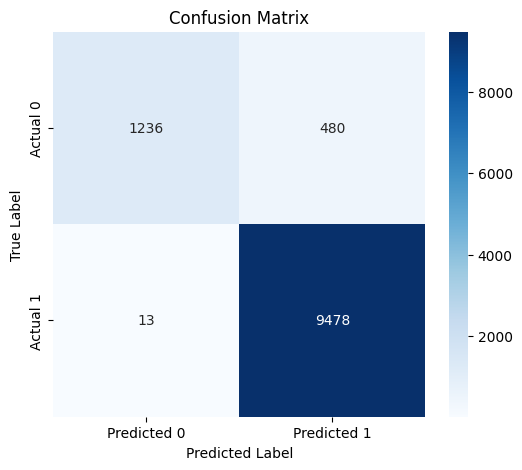

In [100]:

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

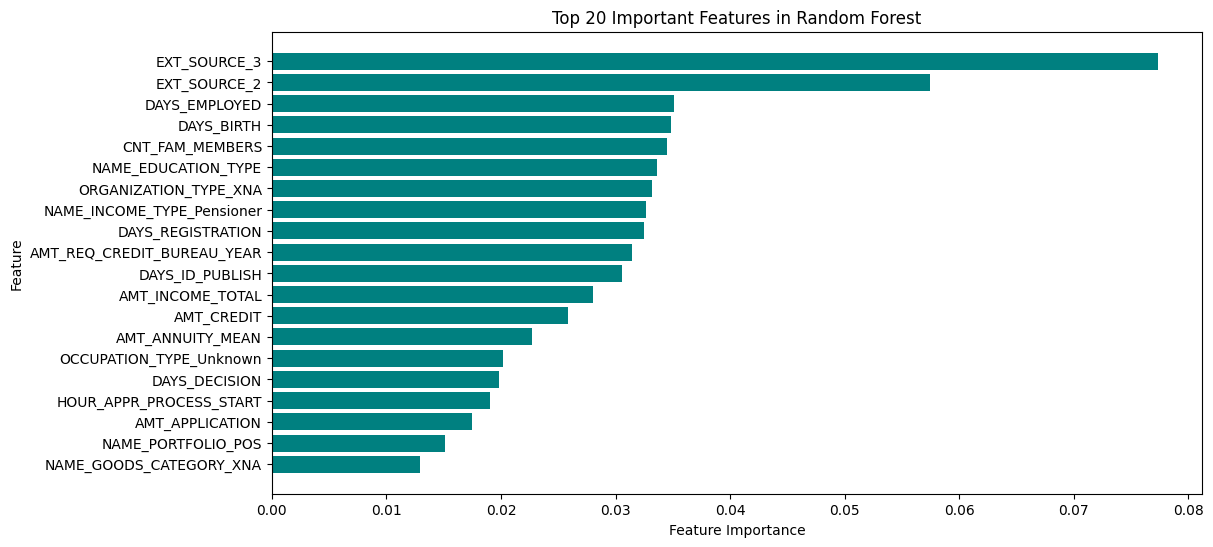

In [101]:
# Plot Top 20 Important Features
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": best_rf.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(feature_importance["Feature"][:20], feature_importance["Importance"][:20], color="teal")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 20 Important Features in Random Forest")
plt.gca().invert_yaxis()
plt.show()

In [104]:
# Try XGBoost for Better Imbalance Handling
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=10,
    learning_rate=0.05,
    scale_pos_weight=len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1]),
    eval_metric="logloss",
    random_state=42
)

xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb_model.predict(X_test)

print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print("\nXGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9613

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.76      0.86      1716
           1       0.96      1.00      0.98      9491

    accuracy                           0.96     11207
   macro avg       0.97      0.88      0.92     11207
weighted avg       0.96      0.96      0.96     11207



### Handle Imbalance in XGBoost

In [106]:

# Compute class imbalance ratio
scale_pos_weight = len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1])

# Train XGBoost with Improved Balance
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=10,
    learning_rate=0.05,
    scale_pos_weight=scale_pos_weight,
    eval_metric="logloss",
    random_state=42
)

xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb_model.predict(X_test)

print(f"XGBoost Accuracy (After Balancing): {accuracy_score(y_test, y_pred_xgb):.4f}")
print("\nXGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy (After Balancing): 0.9613

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.76      0.86      1716
           1       0.96      1.00      0.98      9491

    accuracy                           0.96     11207
   macro avg       0.97      0.88      0.92     11207
weighted avg       0.96      0.96      0.96     11207



In [117]:

# Apply ADASYN to balance data
adasyn = ADASYN(sampling_strategy="auto", random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Train XGBoost Again
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=10,
    learning_rate=0.05,
    scale_pos_weight=1,
    eval_metric="logloss",
    random_state=42
)

xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred_adasyn = xgb_model.predict(X_test)

print(f"XGBoost Accuracy (After ADASYN): {accuracy_score(y_test, y_pred_adasyn):.4f}")
print("\nXGBoost Classification Report (After ADASYN):\n", classification_report(y_test, y_pred_adasyn))


XGBoost Accuracy (After ADASYN): 0.9613

XGBoost Classification Report (After ADASYN):
               precision    recall  f1-score   support

           0       0.98      0.76      0.86      1716
           1       0.96      1.00      0.98      9491

    accuracy                           0.96     11207
   macro avg       0.97      0.88      0.92     11207
weighted avg       0.96      0.96      0.96     11207



In [115]:

# Get Prediction Probabilities
y_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_xgb)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Decision Threshold for XGBoost: {optimal_threshold:.3f}")

# Make Adjusted Predictions
y_pred_adjusted = (y_probs_xgb >= optimal_threshold).astype(int)

print(f"XGBoost Accuracy (After Threshold Tuning): {accuracy_score(y_test, y_pred_adjusted):.4f}")
print("\nXGBoost Classification Report (After Threshold Tuning):\n", classification_report(y_test, y_pred_adjusted))


Optimal Decision Threshold for XGBoost: 0.771
XGBoost Accuracy (After Threshold Tuning): 0.9497

XGBoost Classification Report (After Threshold Tuning):
               precision    recall  f1-score   support

           0       0.79      0.92      0.85      1716
           1       0.98      0.96      0.97      9491

    accuracy                           0.95     11207
   macro avg       0.89      0.94      0.91     11207
weighted avg       0.95      0.95      0.95     11207



In [114]:

# Compute Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs_xgb)

# Find the best tradeoff between Precision & Recall
f1_scores = (2 * precision * recall) / (precision + recall)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.3f}")

# Make Adjusted Predictions
y_pred_adjusted = (y_probs_xgb >= optimal_threshold).astype(int)

print(f"XGBoost Accuracy (After Threshold Tuning): {accuracy_score(y_test, y_pred_adjusted):.4f}")
print("\nXGBoost Classification Report (After Threshold Tuning):\n", classification_report(y_test, y_pred_adjusted))


Optimal Threshold: 0.599
XGBoost Accuracy (After Threshold Tuning): 0.9677

XGBoost Classification Report (After Threshold Tuning):
               precision    recall  f1-score   support

           0       0.95      0.83      0.89      1716
           1       0.97      0.99      0.98      9491

    accuracy                           0.97     11207
   macro avg       0.96      0.91      0.93     11207
weighted avg       0.97      0.97      0.97     11207

